# Installs and Imports

In [2]:
!pip install transformers
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 12.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

# Load Data and Models

## Tweet Data

In [15]:
file_name = "exp1_no_subject.csv"
df_exp1_no_subject = pd.read_csv(file_name)

In [16]:
file_name = "exp1.csv"
df_exp1 = pd.read_csv(file_name)
df_exp1 = df_exp1[df_exp1['ID'].isin(df_exp1_no_subject['ID'])].reset_index()

In [17]:
df_exp1

,index,ID,original_ID,tweet,sarcastic,rephrase
0,0,6440,sign_6941,i looove getting 3 hours of sleep because two ...,1,i hate getting 3 hours of sleep because two jobs
1,1,12874,sign_12479,i hate people who use big words just to make t...,1,i hate people who use big words just to make t...
2,2,4295,sign_12125,i love that girl who never liked even my dp,1,i love that girl who never liked even my dp
3,3,4147,train_2222,I hate that I wasted my whole weekend 😠,0,NaN
4,4,11437,sign_5017,i love being ignored,1,i hate being ignored
...,...,...,...,...,...,...
118,126,5211,train_682,i love 6 hour panic attacks,1,I don't like having 6-hour panic attacks.
119,127,19299,train_2654,I LOVE LORDE GOODNIGHT,0,NaN
120,128,7159,train_2825,i LOVE grocery shopping,0,NaN
121,129,13743,train_2657,i love video games,0,NaN


In [18]:
df_exp1_no_subject

,ID,original_ID,tweet,sarcastic,rephrase
0,6440,sign_6941,looove getting 3 hours of sleep because two jobs,1,hate getting 3 hours of sleep because two jobs
1,12874,sign_12479,hate people who use big words just to make the...,1,hate people who use big words just to make the...
2,4295,sign_12125,love that girl who never liked even my dp,1,love that girl who never liked even my dp
3,4147,train_2222,Hate that I wasted my whole weekend 😠,0,NaN
4,11437,sign_5017,love being ignored,1,hate being ignored
...,...,...,...,...,...
118,5211,train_682,love 6 hour panic attacks,1,I don't like having 6-hour panic attacks.
119,19299,train_2654,LOVE LORDE GOODNIGHT,0,NaN
120,7159,train_2825,LOVE grocery shopping,0,NaN
121,13743,train_2657,love video games,0,NaN


## Sentiment Classifier

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def classify_sentiment(text) :
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    # [ negative, neutral, positive ]
    return scores

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Get sentiment distance

In [20]:
def sentiment_distance(tweet, verb, noun_phrase):
  """Calculates the sentiment distance (euclidic distance) between the sentiment scores of the V and NP of a given tweet."""

  tweet_sentiment = classify_sentiment(tweet)
  tweet_no_v_sentiment = classify_sentiment(tweet.replace(verb, "")) ##TO DO: change (ask Samba)
  tweet_no_np_sentiment = classify_sentiment(tweet.replace(noun_phrase, "")) ##TO DO: change (ask Samba)
  v_sentiment = tweet_sentiment - tweet_no_v_sentiment
  np_sentiment = tweet_sentiment - tweet_no_np_sentiment

  return np.linalg.norm(v_sentiment - np_sentiment)

In [41]:
import re

#NO SUBJECT
def get_sentiment_distance(ids, tweets):

  id_tweet_sentiment_distance = []
  for id, tweet in zip(ids, tweets):
    tweet_split = tweet.split()
    verb_idx = min([i for i,x in enumerate(tweet_split) if re.match(r"(?i)lo+v|ha+t", x) ])
    if tweet_split[verb_idx-1] == "would":
      verb = " ".join(tweet_split[verb_idx-1:verb_idx+1])
    else:
      verb = tweet_split[verb_idx]
    noun_phrase = " ".join(tweet_split[verb_idx + 1:])

    id_tweet_sentiment_distance.append((id, tweet, sentiment_distance(tweet, verb, noun_phrase)))

    sentiment_max = max([x[2] for x in id_tweet_sentiment_distance])
    id_tweet_sentiment_distance_normalized = [(id, tweet, sentiment_dist/sentiment_max) for id, tweet, sentiment_dist in id_tweet_sentiment_distance]

  return id_tweet_sentiment_distance, id_tweet_sentiment_distance_normalized

In [42]:
exp1_no_subject_data, exp1_no_subject_data_normalized = get_sentiment_distance(df_exp1_no_subject['ID'], df_exp1_no_subject['tweet'])

In [43]:
#WITH SUBJECT
def get_sentiment_distance(ids, tweets):

  id_tweet_sentiment_distance = []
  for id, tweet in zip(ids, tweets):
    tweet_split = tweet.split()
    try :
      i_idx = [x.lower() for x in tweet_split].index("i")
    except Exception :
      i_idx = min([i for i,x in enumerate(tweet_split) if x.lower().startswith("i'")])
    verb = tweet_split[i_idx + 1]
    noun_phrase = " ".join(tweet_split[i_idx + 2:])
    id_tweet_sentiment_distance.append((id, tweet, sentiment_distance(tweet, verb, noun_phrase)))

    sentiment_max = max([x[2] for x in id_tweet_sentiment_distance])
    id_tweet_sentiment_distance_normalized = [(id, tweet, sentiment_dist/sentiment_max) for id, tweet, sentiment_dist in id_tweet_sentiment_distance]

  return id_tweet_sentiment_distance, id_tweet_sentiment_distance_normalized

In [44]:
exp1_data, exp1_data_normalized = get_sentiment_distance(df_exp1['ID'], df_exp1['tweet'])

# T-test

In [45]:
import scipy.stats as stats

exp1_sentiment_distances = [x[2] for x in exp1_data]
exp1_no_subject_sentiment_distances = [x[2] for x in exp1_no_subject_data]

stats.ttest_rel(exp1_sentiment_distances, exp1_no_subject_sentiment_distances)

TtestResult(statistic=11.478683730988868, pvalue=3.9366069009984196e-21, df=122)

In [46]:
import scipy.stats as stats

exp1_sentiment_distances_normalized = [x[2] for x in exp1_data_normalized]
exp1_no_subject_sentiment_distances_normalized = [x[2] for x in exp1_no_subject_data_normalized]

stats.ttest_rel(exp1_sentiment_distances, exp1_no_subject_sentiment_distances)

TtestResult(statistic=11.478683730988868, pvalue=3.9366069009984196e-21, df=122)

# Histograms

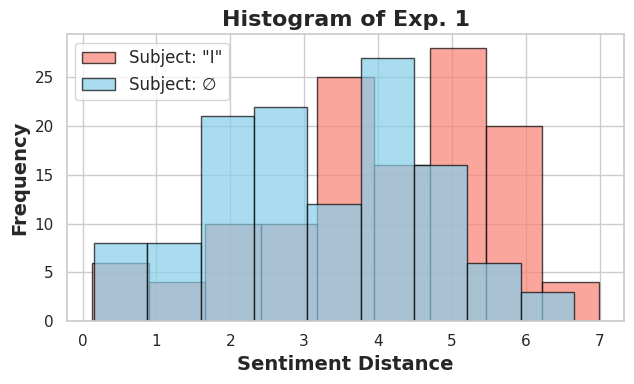

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6.5, 4))
plt.hist(exp1_sentiment_distances, bins=9, alpha=0.7, label='Subject: "I"', color='salmon', edgecolor='black')
plt.hist(exp1_no_subject_sentiment_distances, bins=9, alpha=0.7, label='Subject: ∅', color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Distance', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')
plt.title('Histogram of Exp. 1', fontsize=16, weight='bold')
plt.legend(fontsize=12)

# Improve layout and spacing
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('histogram_exp1_highres.png', dpi=300, bbox_inches='tight')  # PNG file for raster
plt.savefig('histogram_exp1_highres.pdf', bbox_inches='tight')  # PDF file for vector

# Display the histograms
plt.show()
